In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import numpy as np
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.display.max_rows = 5000 

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

### Step 1
fill in ticker, exp: 'cobr.l' 

name variable and variable_2020

# <---------- NEED TO CHANGE THE TICKER

In [2]:
ccz = yf.Ticker('ccz.L')
ccz_2020 = ccz.history(start="2020-01-01", end= datetime.today().strftime('%Y-%m-%d'))
print(ccz_2020.shape)
print(ccz_2020.head())
print(ccz_2020.tail())

(195, 7)
             Open  High   Low  Close    Volume  Dividends  Stock Splits
Date                                                                   
2020-08-04  2.025  2.48  1.75   2.30  23726309          0             0
2020-08-05  2.300  2.60  2.20   2.45   4903456          0             0
2020-08-06  2.450  2.67  2.20   2.45   4487446          0             0
2020-08-07  2.450  2.60  2.28   2.45     73193          0             0
2020-08-10  2.500  2.65  2.37   2.50   2734365          0             0
            Open  High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                  
2021-05-06  2.50  2.50  2.355   2.35  3829539          0             0
2021-05-07  2.35  2.40  2.200   2.40  1911912          0             0
2021-05-10  2.30  2.52  2.267   2.35  2405378          0             0
2021-05-11  2.35  2.60  2.300   2.50  2881054          0             0
2021-05-12  2.50  2.80  2.445   2.65  2301463          0     

###  Step 2
##### prepare placing data. 
1. create new column names: colname_mmyy = 'xxx' (Pay attention on this col name, they will appear in the legend later in the plot) ; create placing date: placing_date_mmyy = 'xxx' ; create raise price: rprice_mmyy = int/float

2. replace dataframe name with xx_2020 above

3. How many placing you want to plot, how many times repeating this step

# <---------- NEED TO CHANGE THE TICKER AND THINGS

In [3]:
# placing1, input 'Placing_Price_mm' , '202x-mm-dd', raise price(int or float)
colname_placing_1 = 'Placing_Price_Aug'
placing_1_date = '2020-08-31'
rprice_1 = 1.7

# replace df names
ccz_2020[colname_placing_1] = rprice_1

ccz_2020.loc[ccz_2020.index <= placing_1_date, colname_placing_1] = None

In [4]:
# placing2, input 'Placing_Price_mm' , '202x-mm-dd', raise price(int or float)
# colname_placing_2 = 'Placing_Price_Sep'
# placing_2_date = '2020-09-30'
# rprice_2 = 2.30

# # replace df names
# cobr_2020[colname_placing_2] = rprice_2

# cobr_2020.loc[cobr_2020.index <= placing_2_date, colname_placing_2] = None

In [5]:
# # placing_3, input 'Placing_Price_mm' , '202x-mm-dd', raise price(int or float)
# colname_placing_3 = 'Placing_Price_Dec'
# placing_3_date = '2020-12-30'
# rprice_3 = 3

# # replace df names
# cobr_2020[colname_placing_3] = rprice_3

# cobr_2020.loc[cobr_2020.index <= placing_3_date, colname_placing_3] = None

### Step 3

get the latest highest 'Close' price and its index in the dataframe

# <---------- NEED TO CHANGE THE TICKER 


In [6]:
# 情况，出现两个highest points, I choose the latest one [-1].
# hcp stands for hightest close price
hcp_idx = ccz_2020[ccz_2020['Close'] == ccz_2020.Close.max()].index[-1]
hcp = np.round(ccz_2020.Close.max(),2)
print(hcp)
print(hcp_idx)

4.4
2021-01-11 00:00:00


In [7]:
# cobr_2020

### Plotting
1. make a copy: df = xx_2020
2. change plot_title = 'xx_Placing_History' , find this in CONTRAL PANEL

In [8]:
df = ccz_2020                        # <---------- DON'T FORGET TO CHANGE NAME

In [9]:
df.loc['2021-4-13','Close'] = df.loc['2021-4-13','Close']*100

In [10]:
df.loc['2021-04-13','Close']

2.500000037252903

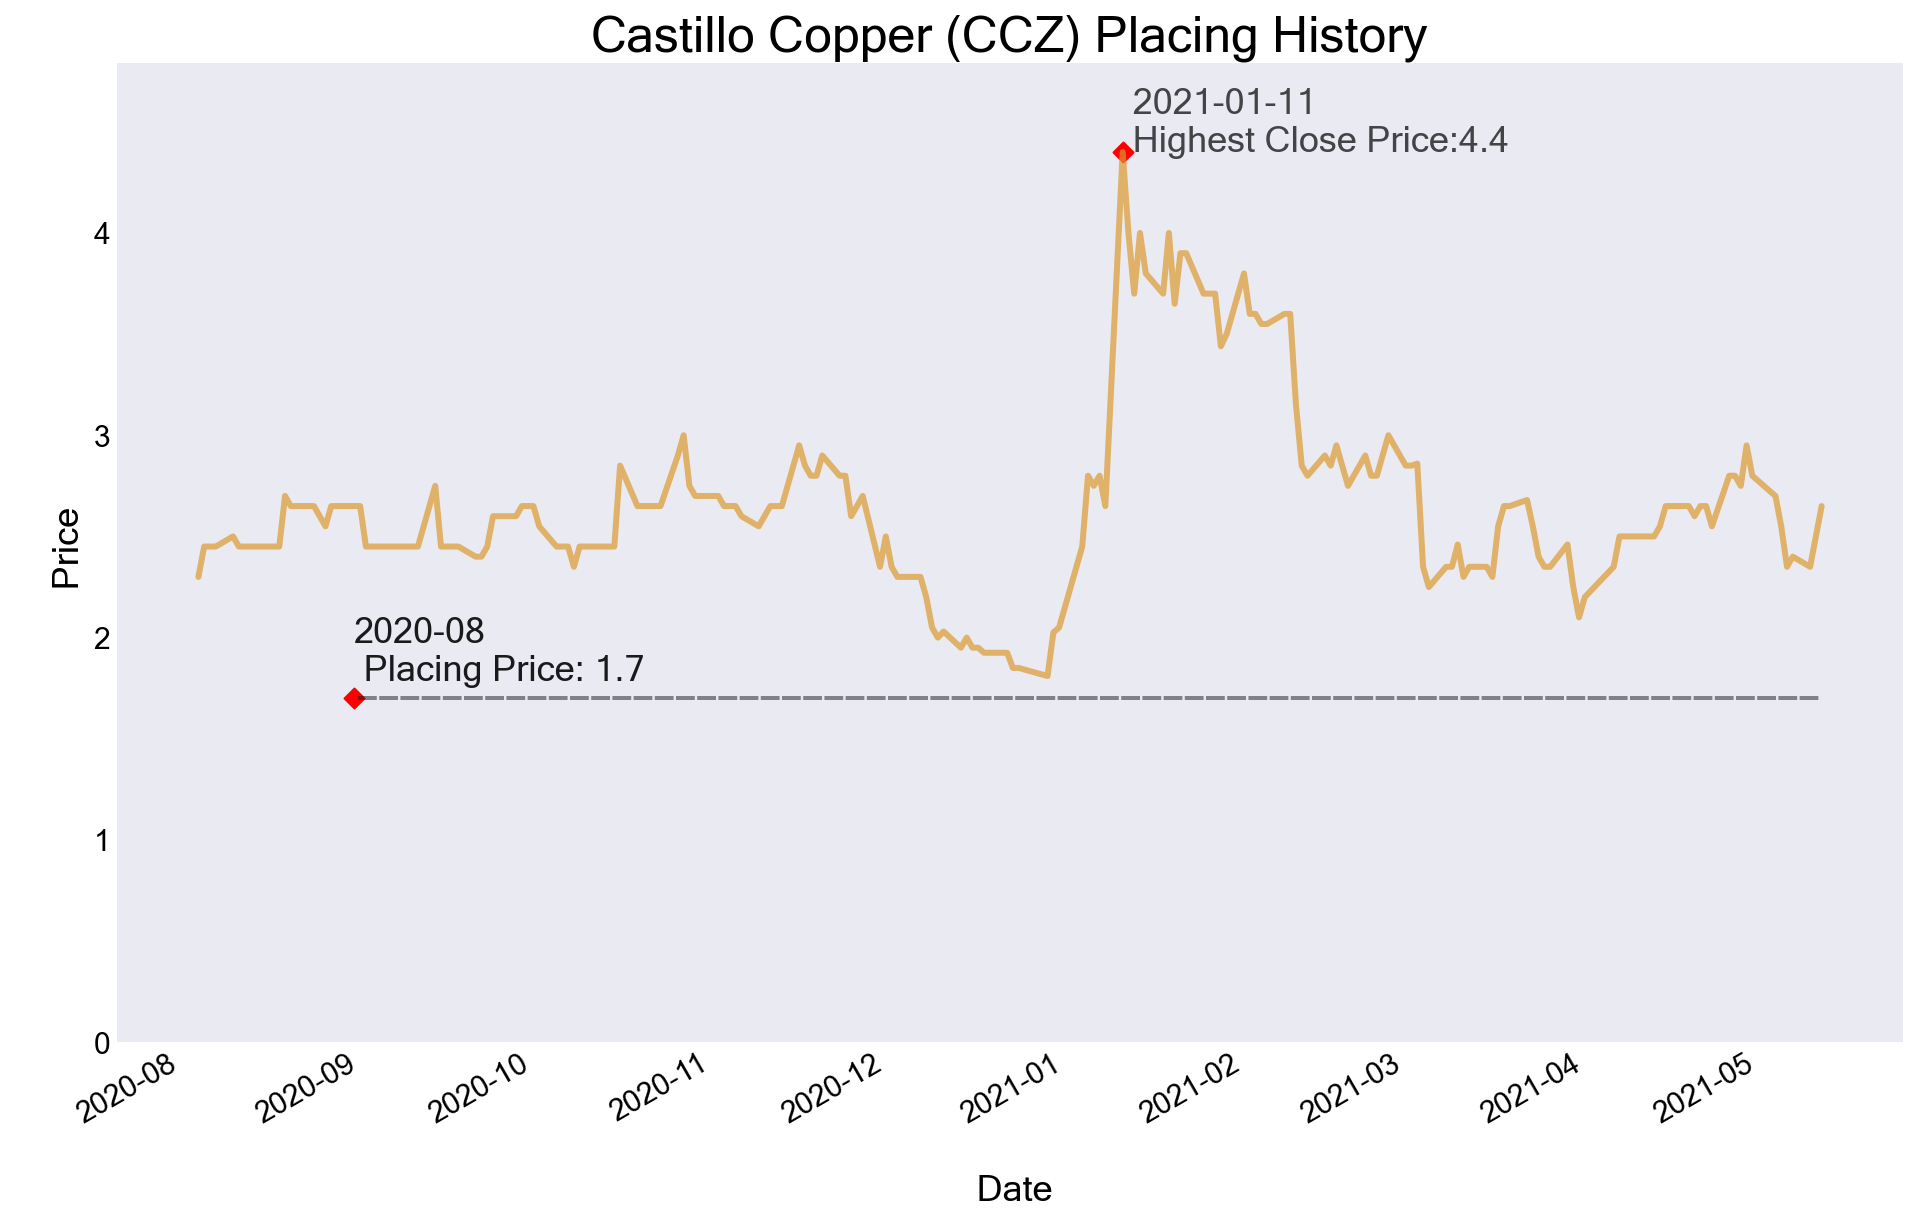

In [11]:
# size and style
# popular sytles: 'fivethirtyeight', 'seaborn-dark','seaborn','Seaborn-dark','seaborn-poster','seaborn-ticks',
# 'seaborn-white','fast','seaborn-whitegrid','dark_background','classic','bmh','Solarize_Light2'
plt.figure(figsize=(16,10) , frameon=False) 
plt.style.use('seaborn-dark')         # <---------- CHOOSE WISELY

#______________________________________________________________________________________

# CONTRAL PANEL
plot_title = 'Castillo Copper (CCZ) Placing History'    # <---------- NEED CHANGING THE TICKER
clr_title = 'k'

# colour scheme control
clr_close = '#dc992e'                   # <---------- NEED TO MATCH THE COLOUR
alpha_close = 0.7

clr_placing1 = '#1a1a1c'
alpha_placing1_text = 1
alpha_placing1_line = 0.5

clr_placing2 = '#1a1a1c'
alpha_placing2_text = 1
alpha_placing2_line = 0.5

clr_placing3 = '#1a1a1c'
alpha_placing3_text = 1
alpha_placing3_line = 0.7

clr_hcp = '#1a1a1c'
alpha_hcp = 0.8


# font 'Marion','optima','Comic Sans MS','Trebuchet MS','Microsoft Sans Serif'
font = 'Microsoft Sans Serif'

#______________________________________________________________________________________

# plot the close price
df.Close.plot( color=clr_close, alpha=alpha_close, linewidth=3)

# marker <---------- CHECK HOW MANY PLACINGS ARE THERE
plt.scatter(placing_1_date, rprice_1, color='r', marker='D', s=50);
# plt.scatter(placing_2_date, rprice_2, color='r', marker='D', s=50);
# plt.scatter(placing_3_date, rprice_3, color='r', marker='D', s=50);

# h-line <---------- CHECK HOW MANY PLACINGS ARE THERE
df[placing_1_date:][colname_placing_1].plot( color= clr_placing1, alpha=alpha_placing1_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
# df[df.index >= placing_2_date][colname_placing_2].plot( color=clr_placing2, alpha=alpha_placing2_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
# df[df.index >= placing_3_date][colname_placing_3].plot( color=clr_placing3, alpha=alpha_placing3_line, linewidth=3, ls='dashed',dash_capstyle='projecting')

# text <---------- CHECK HOW MANY PLACINGS ARE THERE
plt.text(placing_1_date, rprice_1+ rprice_1*0.05, '{} \n Placing Price: {}'.format(placing_1_date[:7],rprice_1), fontsize=18, color= clr_placing1, alpha=alpha_placing1_text, fontname=font)
# plt.text(placing_2_date, rprice_2+ rprice_2*0.05, '{} \n Placing Price: {}'.format(placing_2_date[:7],rprice_2), fontsize=18, color= clr_placing2, alpha=alpha_placing2_text, fontname=font)
# plt.text(placing_3_date, rprice_3+ rprice_3*0.05, '{} \n Placing Price: {}'.format(placing_3_date[:7], rprice_3), fontsize=18, color= clr_placing3, alpha=alpha_placing3_text, fontname=font)


# highest close price point
plt.scatter(hcp_idx, hcp , color='r', marker='D', s=50);
plt.text(hcp_idx, hcp , ' {}\n Highest Close Price:{}'.format(str(hcp_idx)[:10], hcp),fontname=font, fontsize=18, color=clr_hcp, alpha = alpha_hcp)

# title
plt.title('{}'.format(plot_title), fontsize=25, color=clr_title,fontname=font)

# legend
# plt.legend(loc=(0.8,0.05), fontsize=12, frameon=True, fancybox=True,shadow=True, framealpha=None, facecolor='inherit')

# Y axis
plt.yticks(fontsize=15,color='k')
plt.ylim(0,df.Close.max()+df.Close.max()*0.1)
plt.ylabel('\n Price', fontsize=18,fontname=font, color='k')

# X axis
plt.xticks( fontsize=15,color='k', rotation=30)
plt.xlabel('\n Date', fontsize=18,fontname=font, color='k')

# save as png
plt.savefig('{}'.format(plot_title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()


# # 中文显示

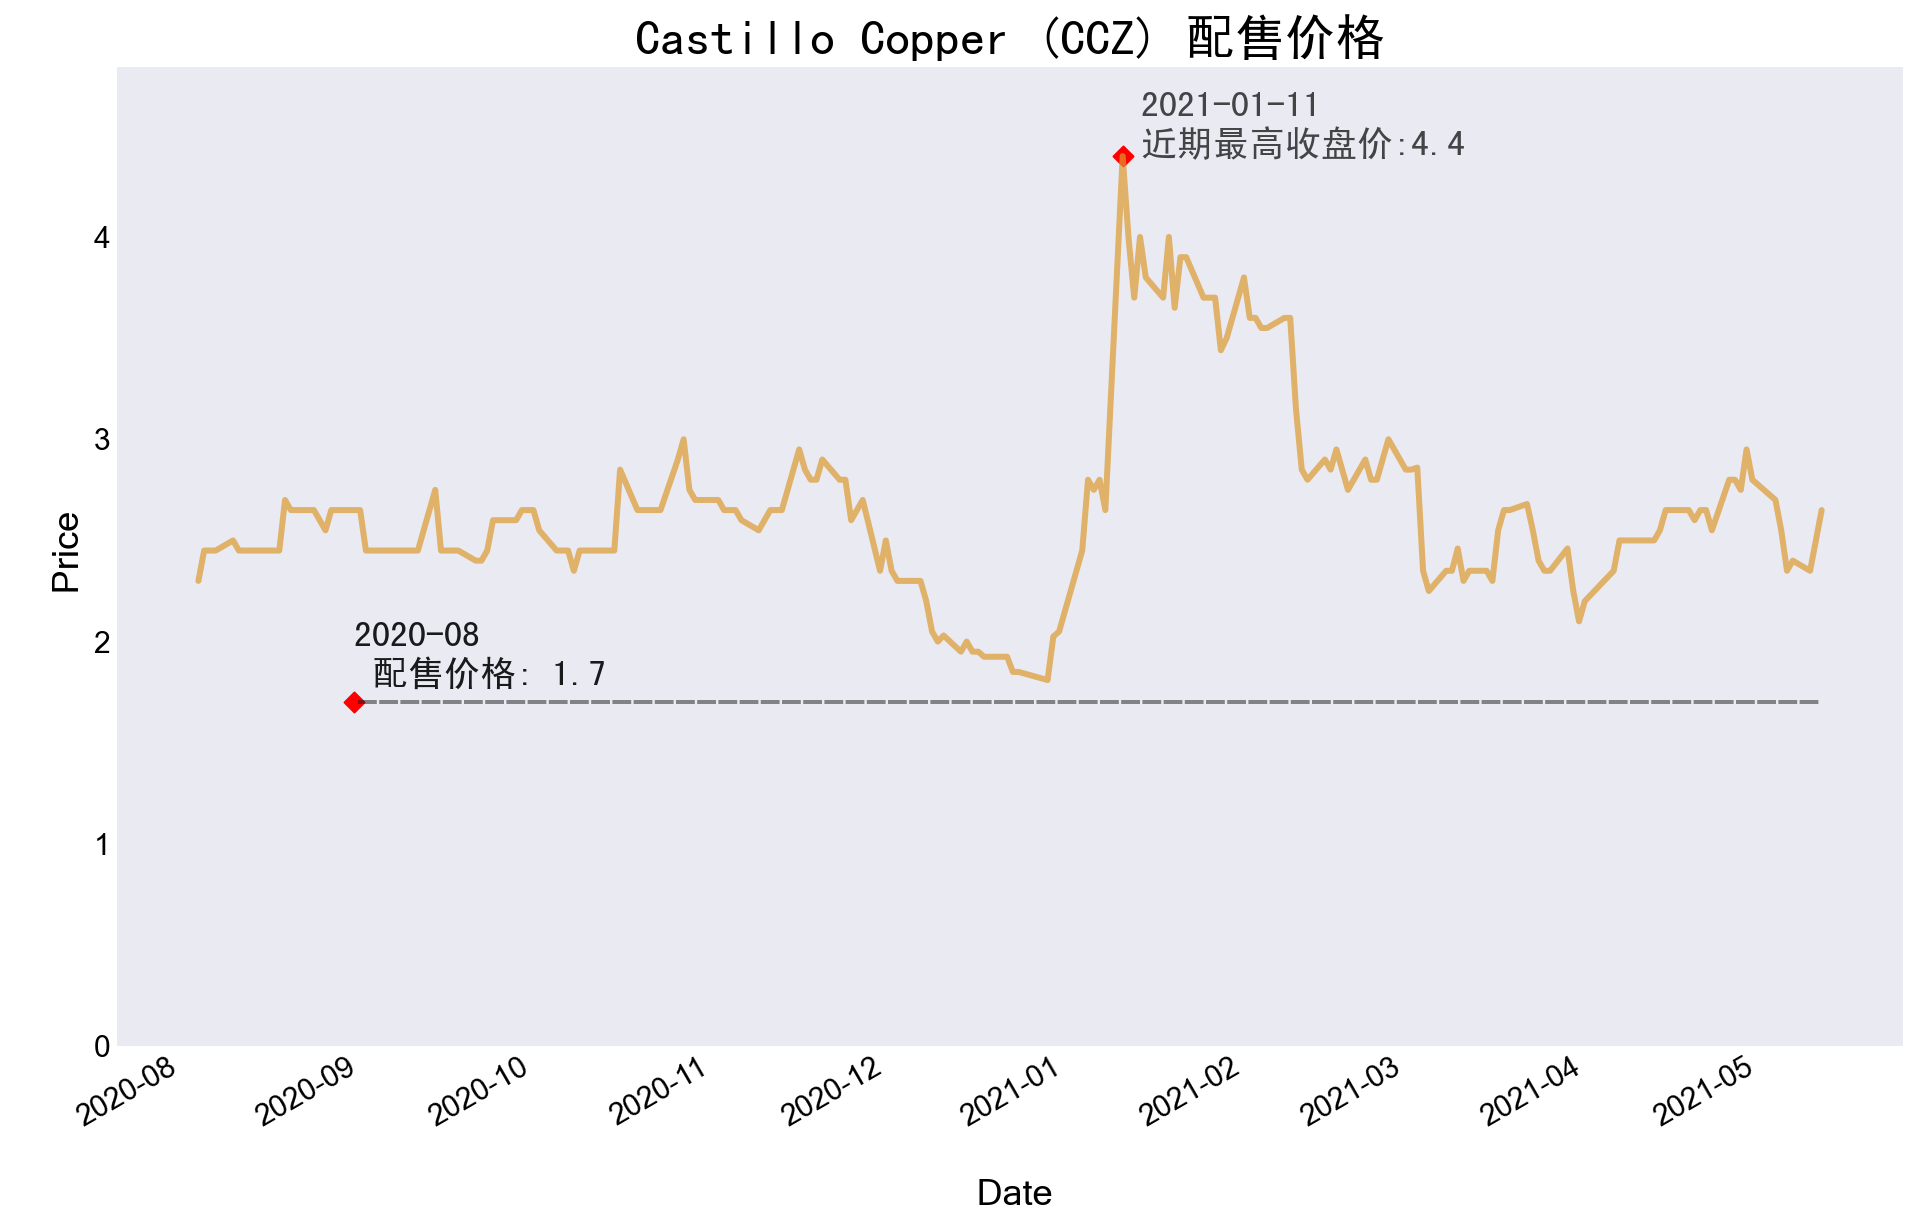

In [12]:
# size and style
# popular sytles: 'fivethirtyeight', 'seaborn-dark','seaborn','Seaborn-dark','seaborn-poster','seaborn-ticks',
# 'seaborn-white','fast','seaborn-whitegrid','dark_background','classic','bmh','Solarize_Light2'
plt.figure(figsize=(16,10) , frameon=False) 
plt.style.use('seaborn-dark')         # <---------- CHOOSE WISELY

#______________________________________________________________________________________

# CONTRAL PANEL
plot_title = 'Castillo Copper (CCZ) 配售价格'    # <---------- NEED CHANGING THE TICKER
clr_title = 'k'

# colour scheme control
clr_close = '#dc992e'                   # <---------- NEED TO MATCH THE COLOUR
alpha_close = 0.7

clr_placing1 = '#1a1a1c'
alpha_placing1_text = 1
alpha_placing1_line = 0.5

clr_placing2 = '#1a1a1c'
alpha_placing2_text = 1
alpha_placing2_line = 0.5

clr_placing3 = '#1a1a1c'
alpha_placing3_text = 1
alpha_placing3_line = 0.7

clr_hcp = '#1a1a1c'
alpha_hcp = 0.8


# font 'Marion','optima','Comic Sans MS','Trebuchet MS','Microsoft Sans Serif'
font = 'Microsoft Sans Serif'

#______________________________________________________________________________________

# plot the close price
df.Close.plot( color=clr_close, alpha=alpha_close, linewidth=3)

# marker <---------- CHECK HOW MANY PLACINGS ARE THERE
plt.scatter(placing_1_date, rprice_1, color='r', marker='D', s=50);
# plt.scatter(placing_2_date, rprice_2, color='r', marker='D', s=50);
# plt.scatter(placing_3_date, rprice_3, color='r', marker='D', s=50);

# h-line <---------- CHECK HOW MANY PLACINGS ARE THERE
df[placing_1_date:][colname_placing_1].plot( color= clr_placing1, alpha=alpha_placing1_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
# df[df.index >= placing_2_date][colname_placing_2].plot( color=clr_placing2, alpha=alpha_placing2_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
# df[df.index >= placing_3_date][colname_placing_3].plot( color=clr_placing3, alpha=alpha_placing3_line, linewidth=3, ls='dashed',dash_capstyle='projecting')

# text <---------- CHECK HOW MANY PLACINGS ARE THERE
plt.text(placing_1_date, rprice_1+ rprice_1*0.05, '{} \n 配售价格: {}'.format(placing_1_date[:7],rprice_1),fontproperties = 'SimHei', fontsize=18, color= clr_placing1, alpha=alpha_placing1_text)
# plt.text(placing_2_date, rprice_2+ rprice_2*0.05, '{} \n Placing Price: {}'.format(placing_2_date[:7],rprice_2), fontsize=18, color= clr_placing2, alpha=alpha_placing2_text, fontname=font)
# plt.text(placing_3_date, rprice_3+ rprice_3*0.05, '{} \n Placing Price: {}'.format(placing_3_date[:7], rprice_3), fontsize=18, color= clr_placing3, alpha=alpha_placing3_text, fontname=font)


# highest close price point
plt.scatter(hcp_idx, hcp , color='r', marker='D', s=50);
plt.text(hcp_idx, hcp , ' {}\n 近期最高收盘价:{}'.format(str(hcp_idx)[:10], hcp),fontproperties = 'SimHei', fontsize=18, color=clr_hcp, alpha = alpha_hcp)

# title
plt.title('{}'.format(plot_title), fontproperties = 'SimHei',fontsize=25, color=clr_title,)

# legend
# plt.legend(loc=(0.8,0.05), fontsize=12, frameon=True, fancybox=True,shadow=True, framealpha=None, facecolor='inherit')

# Y axis
plt.yticks(fontsize=15,color='k')
plt.ylim(0,df.Close.max()+df.Close.max()*0.1)
plt.ylabel('\n Price', fontsize=18,fontname=font, color='k')

# X axis
plt.xticks( fontsize=15,color='k', rotation=30)
plt.xlabel('\n Date', fontsize=18,fontname=font, color='k')

# save as png
plt.savefig('{}'.format(plot_title),dpi=300,bbox_inches ='tight',pad_inches = 1,transparent = True,orientation ='landscape')
plt.show()


In [ ]:
# successful

In [ ]:
# to be continued

In [ ]:
# tbd

In [ ]:
import numpy as pn